# NAME : RAKSHITA MADHAVAN
# DOMAIN : DATA SCIENCE AND BUISNESS ANALYTICS
# TASK 1 : PREDICTION USING SUPERVISED ML




In [244]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import seaborn as sns
sns.set()
%matplotlib inline


In [245]:
#importing dataset
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(data.values)




[[ 2.5 21. ]
 [ 5.1 47. ]
 [ 3.2 27. ]
 [ 8.5 75. ]
 [ 3.5 30. ]
 [ 1.5 20. ]
 [ 9.2 88. ]
 [ 5.5 60. ]
 [ 8.3 81. ]
 [ 2.7 25. ]
 [ 7.7 85. ]
 [ 5.9 62. ]
 [ 4.5 41. ]
 [ 3.3 42. ]
 [ 1.1 17. ]
 [ 8.9 95. ]
 [ 2.5 30. ]
 [ 1.9 24. ]
 [ 6.1 67. ]
 [ 7.4 69. ]
 [ 2.7 30. ]
 [ 4.8 54. ]
 [ 3.8 35. ]
 [ 6.9 76. ]
 [ 7.8 86. ]]


In [246]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [247]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [248]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [249]:
df= pd.DataFrame(data)
print(df.dtypes)
print("Shape of object : ",df.shape)

Hours     float64
Scores      int64
dtype: object
Shape of object :  (25, 2)


In [250]:
data.isnull().sum()
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


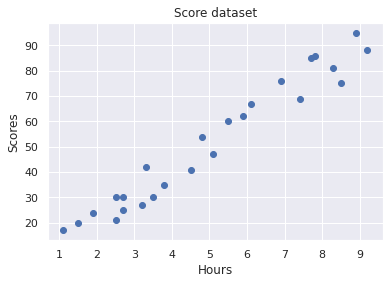

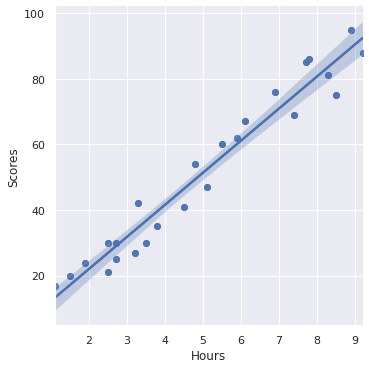

In [251]:
#data visualisation

fig, ax = plt.subplots()
ax.scatter(data['Hours'], data['Scores']) 
ax.set_title("Score dataset")
ax.set_xlabel("Hours")
ax.set_ylabel("Scores")
sns.lmplot(x="Hours", y="Scores", data=data);
sns.regplot(x="Hours", y="Scores", data=data);


Text(0, 0.5, 'Scores')

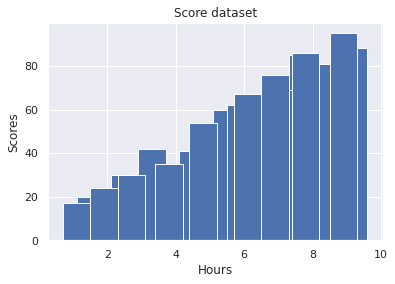

In [252]:
fig, ax = plt.subplots()
ax.bar(data['Hours'], data['Scores']) 
ax.set_title("Score dataset")
ax.set_xlabel("Hours")
ax.set_ylabel("Scores")

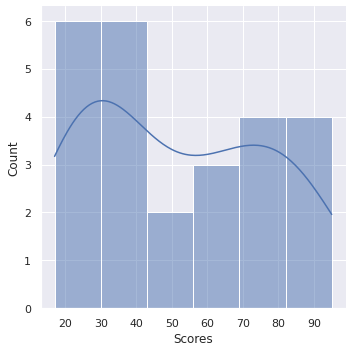

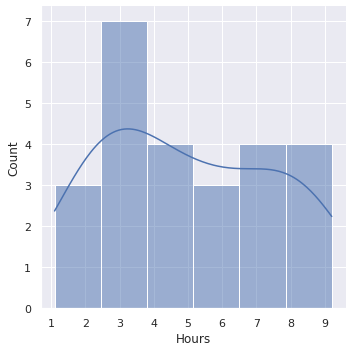

In [253]:
sns.displot(data=data, x="Scores", kde= True)
plt.show()
sns.displot(data=data, x="Hours", kde= True)
plt.show()


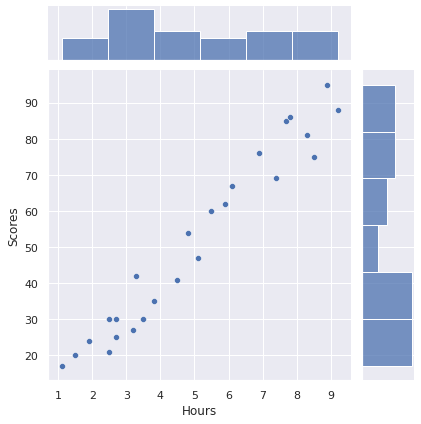

In [254]:
sns.jointplot(x="Hours", y="Scores", data=data, kind="scatter");

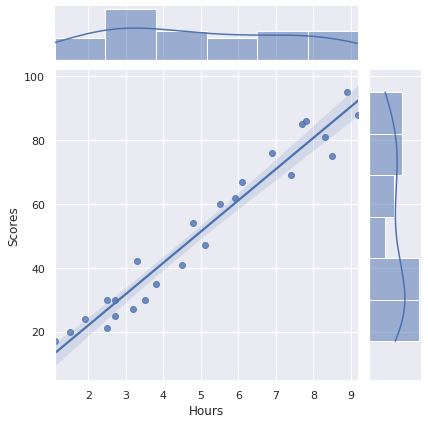

In [255]:
sns.jointplot(x="Hours", y="Scores", data=data, kind="reg");

In [256]:
#splitting dataset
x = data.iloc[: , :-1].values
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [257]:
#training dataset
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print("Intercept :",reg.intercept_)
print("Slope : ", reg.coef_)

Intercept : 1.9322042531516601
Slope :  [9.94167834]


In [258]:
#predicting
Y_pred = reg.predict(X_test)
df = pd.DataFrame({' Actual':Y_test , 'Predicted ':Y_pred})
print(df)

    Actual  Predicted 
0       20   16.844722
1       27   33.745575
2       69   75.500624
3       30   26.786400
4       62   60.588106
5       35   39.710582
6       24   20.821393


In [259]:
#evaluating performance
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(Y_test,Y_pred) )
print("Root Mean Square Error  : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error :  4.130879918502482
Mean Squared Error :  20.33292367497996
Root Mean Square Error  :  4.509204328368805
